# En clase sesión 7

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/ab_test-sales_pipeline.csv')
df.head()

,test,conversion,no conversion
0,B,0,1
1,A,0,1
2,A,0,1
3,A,0,1
4,A,0,1


In [ ]:
total_count = df.groupby('test')[['conversion','no conversion']].sum()
total_count

,conversion,no conversion
test,,
A,198,23541
B,184,22404


In [ ]:
total_count['success_rate'] = total_count['conversion']/ (total_count['conversion'] + total_count['no conversion'])
total_count

,conversion,no conversion,success_rate
test,,,
A,198,23541,0.008341
B,184,22404,0.008146


In [ ]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['success_rate']/total_count.loc['A']['success_rate'])
f'El test A fue {diferencia_en_proporcion*100:.4f}% mejor que B'

'El test A fue 2.3354% mejor que B'

In [ ]:
## Prueba de permutacion

conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

value_counts = df['test'].value_counts()

for i in range(1000):
    a = df.sample(value_counts.loc['A'],replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())

    b = df.loc[~df.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

In [ ]:
results = pd.DataFrame({
    'conv_a':conv_a,
    'no_conv_a':no_conv_a,
    'conv_b':conv_b,
    'no_conv_b':no_conv_b,
})

results

,conv_a,no_conv_a,conv_b,no_conv_b
0,209,23530,173,22415
1,194,23545,188,22400
2,195,23544,187,22401
3,168,23571,214,22374
4,199,23540,183,22405
...,...,...,...,...
995,199,23540,183,22405
996,200,23539,182,22406
997,191,23548,191,22397
998,204,23535,178,22410


In [ ]:
results['a_conv_rate'] = results['conv_a'] / (results['conv_a'] +results['no_conv_a'])
results['b_conv_rate'] = results['conv_b'] / (results['conv_b'] +results['no_conv_b'])

results['diff'] = 1 -(results['a_conv_rate']/results['b_conv_rate'])
results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,209,23530,173,22415,0.008804,0.007659,-0.149517
1,194,23545,188,22400,0.008172,0.008323,0.018118
2,195,23544,187,22401,0.008214,0.008279,0.007779
3,168,23571,214,22374,0.007077,0.009474,0.253017
4,199,23540,183,22405,0.008383,0.008102,-0.034707
...,...,...,...,...,...,...,...
995,199,23540,183,22405,0.008383,0.008102,-0.034707
996,200,23539,182,22406,0.008425,0.008057,-0.045620
997,191,23548,191,22397,0.008046,0.008456,0.048486
998,204,23535,178,22410,0.008593,0.007880,-0.090500


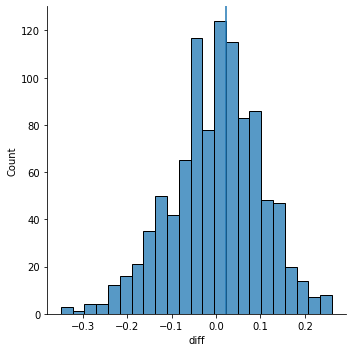

In [ ]:
sns.displot(results['diff'])
plt.axvline(diferencia_en_proporcion)

In [ ]:
(results['diff'] >= diferencia_en_proporcion).sum() / results.shape[0] * 100

42.8

## Lenguaje Natural

In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_json('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/new_york_times_bestsellers-clean.json')
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [ ]:
#grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title = df.groupby('title')['description'].max()

In [ ]:
grouped_by_title[grouped_by_title.str.contains('[0-9]', case=False)]

title
1Q84                          In 1980s Tokyo, a woman who punishes perpetrat...
2030                          In 2030, the young resent the elderly for drai...
A LESSON IN SECRETS           In the summer of 1932, Maisie Dobbs’s first as...
A MEMORY OF LIGHT             The 14th and final novel in the Wheel of Time ...
A MERCY                       In 17th-­century America, a slave mother urges...
                                                    ...                        
WAKING THE WITCH                 Book 11 of the Women of the Otherworld series.
WHERE WE BELONG               A woman’s successful life is disrupted by the ...
WHERE'D YOU GO, BERNADETTE    A renowned and reclusive Seattle architect dis...
WHITE WITCH, BLACK CURSE      A witch who is also a bounty hunter avenges he...
WORST CASE                    A New York detective raising 10 children alone...
Name: description, Length: 123, dtype: object

In [ ]:
grouped_by_title = [grouped_by_title.str.contains('woman',case=False)]


In [ ]:
import nltk

NLTK

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace([^\w\s])

SyntaxError: invalid syntax (4084018623.py, line 3)

In [ ]:
tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [ ]:
all_words = tokenized.sum()
text = nltk.Text(all_words)
text

<Text: Detective Lindsay Boxer and the Women ’ s...>

In [ ]:
text.similar('woman')

man widow detective killer series war family case doctor friend boy
target yacht sheriff murder accident dog nanny group secret


In [ ]:
text.concordance('man',lines=20)

Displaying 20 of 36 matches:
. A woman in her late 30s marries the man of her dreams and reaches out to his 
r hides his male lover . A former hit man for the mob who has become a doctor i
y the betrayals of her mother and the man she loves . Intrigue on the planet Sa
85 . Two agents are tracking the same man , a human trafficker who is now deali
lorida for a missing girl and the con man who seduced her . A runaway girl and 
deployed to Iraq . A distraught young man discovers that he has grown horns . A
mpire of Charis fights to survive . A man who kidnapped a 15-year-old girl cont
I.A . stand in his way . When a young man finds a bag of diamonds , he gets the
stigator Maisie Dobbs helps an Indian man whose sister ’ s murder has been igno
ttacks . A woman , her daughter and a man accused of murder evade the authoriti
ooper becomes involved when a wealthy man assaults a maid in a Manhattan hotel 
As Christmas nears , a terminally ill man is preparing his family for his death
 Air Force 

In [ ]:
text.similar('man')


woman killer widow murder war mystery case vampire disappearance boy
target murderer yacht shooting priest detective the women baby series


In [ ]:
text.common_contexts(['woman','man'])

a_in a_with a_who young_s


In [ ]:
len(text)

14545

In [ ]:
len(set(text))


3401

In [ ]:
#cuantifica riqueza léxica
len(set(text)) / len(text)


0.23382605706428325

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text.collocations()

New York; serial killer; Stone Barrington; Los Angeles; writing
pseudonymously; Nora Roberts; Eve Dallas; Lt. Eve; Sookie Stackhouse;
Anita Blake; North Carolina; Alex Cross; Eve Duncan; Dagger
Brotherhood; Doc Ford; Jason Bourne; Lacey Sherlock; Mitch Rapp;
Temperance Brennan; forensic sculptor


In [ ]:
nltk.download(text)

AttributeError: 'Text' object has no attribute 'id'

In [ ]:
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common()

[('.', 816),
 ('a', 686),
 ('the', 628),
 (',', 487),
 ('of', 417),
 ('in', 303),
 ('to', 281),
 ('and', 279),
 ('A', 230),
 ('’', 187),
 ('s', 170),
 ('The', 150),
 ('her', 136),
 ('is', 126),
 ('his', 123),
 ('an', 112),
 ('who', 109),
 ('for', 102),
 ('with', 92),
 (';', 80),
 ('woman', 73),
 ('from', 70),
 ('on', 69),
 ('by', 68),
 ('series', 61),
 ('In', 61),
 ('that', 60),
 ('novel', 49),
 ('“', 48),
 ('”', 47),
 ('murder', 47),
 ('killer', 42),
 ('as', 40),
 ('detective', 40),
 ('at', 39),
 ('must', 39),
 ('has', 38),
 ('investigates', 38),
 ('An', 37),
 ('young', 35),
 ('New', 35),
 ('man', 35),
 ('when', 34),
 ('life', 33),
 ('she', 33),
 ('family', 32),
 ('former', 31),
 ('book', 30),
 ('about', 30),
 ('their', 29),
 ('are', 28),
 ('Book', 27),
 ('York', 27),
 ('new', 26),
 ('death', 25),
 ('mother', 24),
 ('he', 24),
 ('into', 23),
 ('agent', 23),
 ('wife', 22),
 ('C.I.A', 21),
 ('love', 21),
 ('discovers', 21),
 ('lawyer', 21),
 ('this', 20),
 ('murdered', 20),
 ('finds', 2

In [ ]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

freq_dist_no_stop_words.most_common(10)

#### Repaso

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [ ]:
df = pd.read_json('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/new_york_times_bestsellers-clean.json')
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [ ]:
grouped_by_title = df.groupby('title')['description'].last()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.dropna()
grouped_by_title = grouped_by_title.str.replace('\\n','') #remplaza enters por nada
grouped_by_title = grouped_by_title.str.replace('\d','') #remplaza signos de puntuación
grouped_by_title = grouped_by_title.str.replace('[^\w\s]','') #remplaza enters por nada

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
stop_words = stopwords.words('english')
all_words_stop = [word for word in all_words if word not in stop_words]
freq_dist = nltk.FreqDist(all_words_stop)

In [ ]:
freq_dist.most_common(10)

[('woman', 62),
 ('series', 58),
 ('new', 58),
 ('detective', 53),
 ('book', 53),
 ('murder', 49),
 ('novel', 48),
 ('killer', 40),
 ('investigates', 40),
 ('must', 39)]

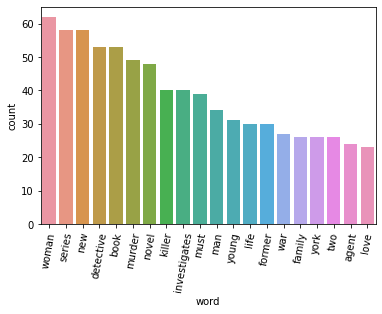

In [ ]:
most_common_20 = pd.DataFrame(freq_dist.most_common(20),columns=['word','count'])

fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(data=most_common_20,x='word',y='count',ax=ax)
ax.tick_params(axis='x',rotation=80)

<AxesSubplot:ylabel='Count'>

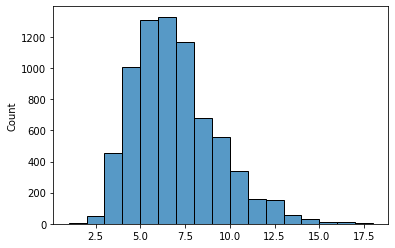

In [ ]:
world_lengths = [len(word) for word in all_words_stop]
sns.histplot(world_lengths,binwidth=1)

Bigramas: Palabras utilizadas en conjunto

<AxesSubplot:xlabel='counts', ylabel='words'>

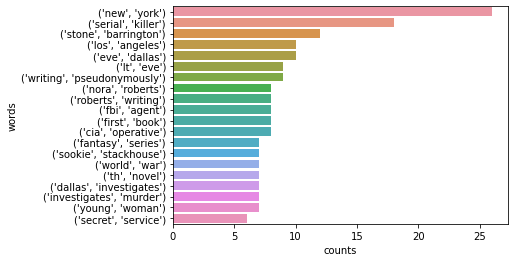

In [ ]:
text = nltk.Text(all_words_stop)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))
common_20 = pd.DataFrame(freq_dist_bigrams.most_common(20),columns=['words','counts'])
sns.barplot(data=common_20,x='counts',y='words')

### wordClouds

In [ ]:
!pip install WordCloud

In [ ]:
from wordcloud import WordCloud

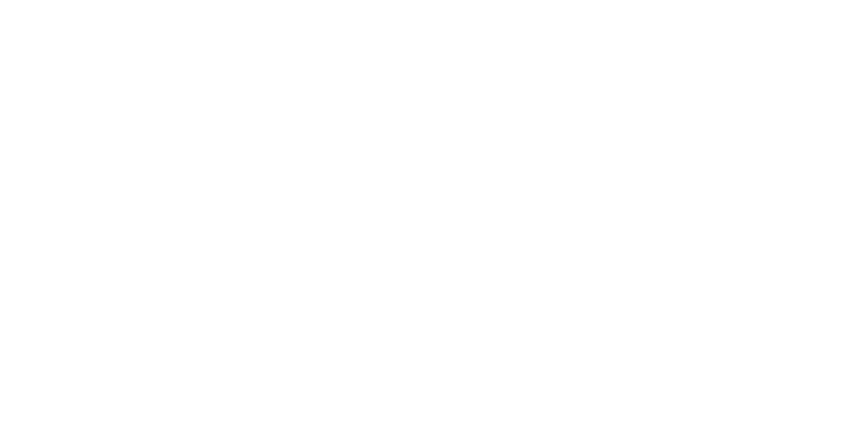

In [ ]:
wordcloud = WordCloud(max_font_size=100,background_color='white').generate(''.join(all_words_stop))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#parte de reto 4
#Obtén una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.

palabras_10 = [word for word in all_words_stop if len(word) >= 10]
freq_dist_10 = nltk.FreqDist(palabras_10)
freq_dist_10_7 = [(key,freq_dist_10[key]) for key in freq_dist_10 if freq_dist_10[key] >=7]

dataframe = pd.DataFrame(freq_dist_10_7,columns=['word','count'])
dataframe


,word,count
0,investigates,40
1,investigator,19
2,investigate,14
3,barrington,12
4,paranormal,9
5,investigation,9
6,disappearance,9
7,pseudonymously,9
8,characters,9
9,washington,8


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>